Ваша задача — построить модель машинного обучения для предсказания целевой переменной на примере датасета ирисы Фишера. В процессе выполнения задания вы должны применить концепции переобучения и недообучения, кросс-валидации, регуляризации (L1 и L2), а также оценить способность вашей модели к обобщению.

1. Предварительная обработка данных.
Загрузите данные и проведите их первичный анализ. Очистите данные, если это необходимо, и проведите их нормализацию/стандартизацию.
Разделите данные на тренировочный и тестовый наборы.

2. Обучение модели.
— Обучите модель логистической регрессии без регуляризации. Оцените её качество на тренировочных и тестовых данных.
— Повторите шаг с добавлением L1- и L2-регуляризации. Подберите оптимальные значения параметра регуляризации с помощью кросс-валидации.

3. Анализ результатов.
— Сравните качество всех трёх моделей (без регуляризации, с L1- и с L2-регуляризацией). Как влияют L1 и L2 на качество модели по сравнению с базовой моделью?
— Постройте графики кривых обучения для каждой из моделей. Что вы можете сказать о способности ваших моделей к обобщению?


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, accuracy_score, precision_score, recall_score, f1_score

1. Предварительная обработка данных.
Загрузите данные и проведите их первичный анализ. Очистите данные, если это необходимо, и проведите их нормализацию/стандартизацию.
Разделите данные на тренировочный и тестовый наборы.

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

In [16]:
# сформируем датайрейм из данных
# дадим признакам более короткие (удобные) наименования
# добавим к датасетсу целевую переменную
df = pd.DataFrame(data.data, columns=data.feature_names)
df.rename(columns={'sepal length (cm)':'sepal_l',
                    'sepal width (cm)':'sepal_w',
                    'petal length (cm)':'petal_l',
                    'petal width (cm)':'petal_w'}, inplace=True)
df['target'] = data.target
df.head(3)

,sepal_l,sepal_w,petal_l,petal_w,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [17]:
# датасет небольшой, пропщенных значений нет.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sepal_l  150 non-null    float64
 1   sepal_w  150 non-null    float64
 2   petal_l  150 non-null    float64
 3   petal_w  150 non-null    float64
 4   target   150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [18]:
# Выведем основные статистики по признакам
# Нулевых и отрицательных значений нет - не нужно заполнять нулевые и отрицательные значения.
# Каких то существенных выбосов не наблюдается - не нужно боротся с выбросами
df.describe()

,sepal_l,sepal_w,petal_l,petal_w,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [19]:
# Целевая переменная - категориальная состоит из трех значений. Распределение равномерное, смещения классов нет.
# Смысла визуализировать нет
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

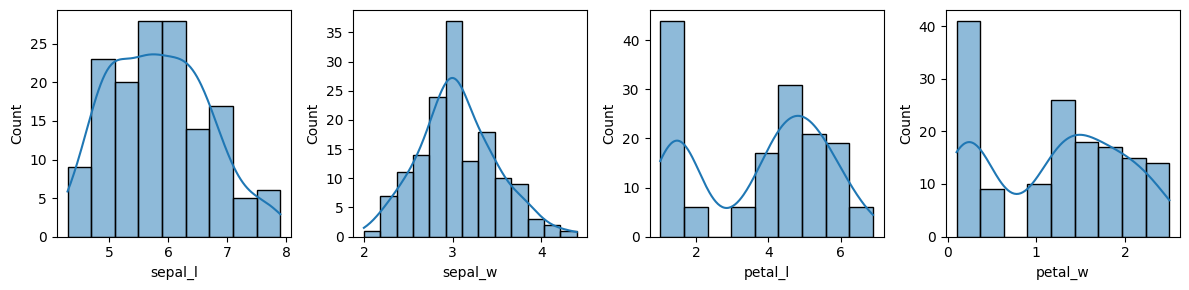

In [32]:
# Визуализируем признаки
# Распределение значения признаков sepal_* похоже на нормальное, признаков petal_* не может быть отнесено к нормальному.
plt.figure(figsize=(12, 3))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(1, 4, i)
    sns.histplot(df[column], kde=True)

plt.tight_layout()
plt.show()

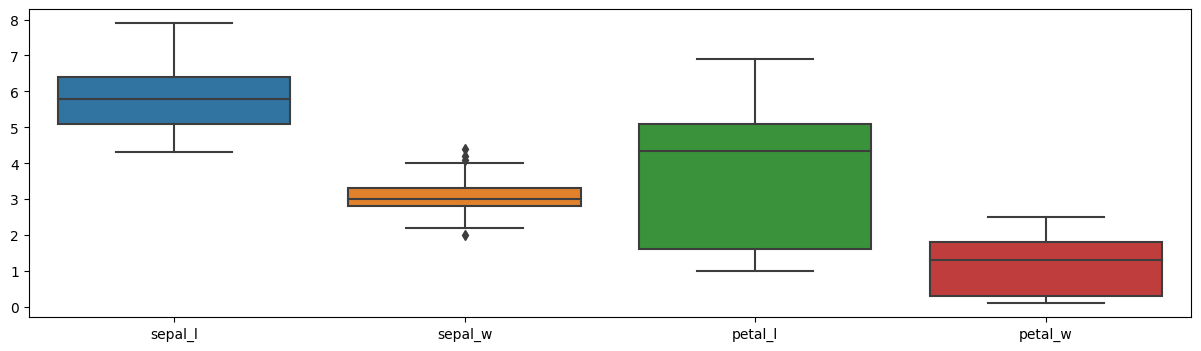

In [38]:
# Визуализируем признаки с помощью boxplot.
# Наблюдается так же картина, что и на графике выше.
# Признаки petal_* имеют более высокую вариативность, чем признаки sepal_*
fig, ax = plt.subplots(figsize=(15,4))
sns.boxplot(data= df.iloc[: , :-1], ax=ax)
plt.show()

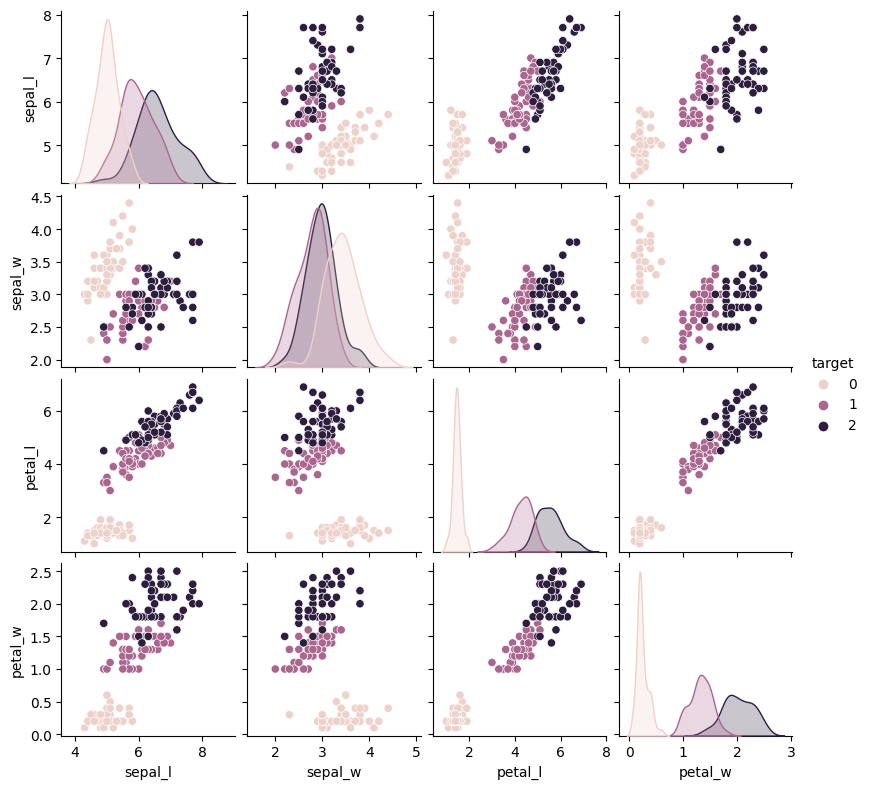

In [56]:
# Выведем парную диаграмму
sns.pairplot(df, hue='target', height=2);

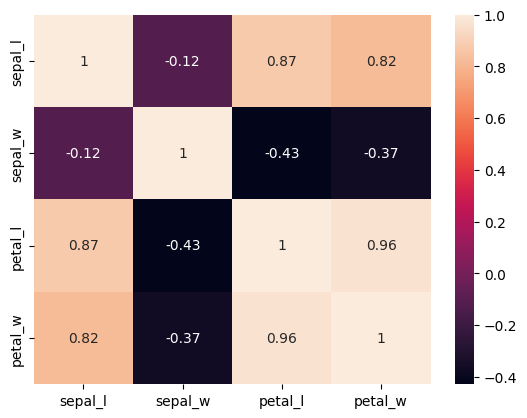

In [58]:
# Построим теполовую карту корреляции признаков между собой
# Признаки petal_*  сильно скоррелированы с признаком sepal_l
# Признаки petal_* сильно скоррелирваны между собой
# Признаки petal_l и sepal_* имеют седнюю отрицательную корреляцию

sns.heatmap(df.iloc[: , :-1].corr(method='pearson'), annot = True);   
plt.show();

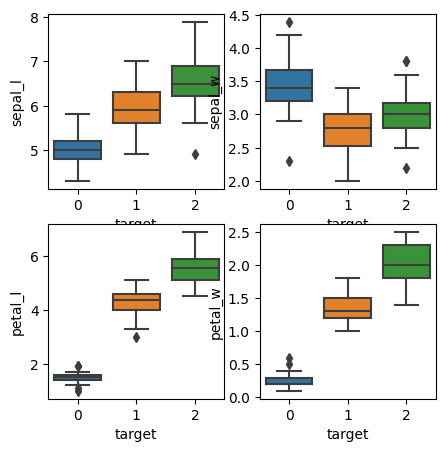

In [62]:
def graph(y): 
    sns.boxplot(x="target", y=y, data=df) 
  
plt.figure(figsize=(5,5)) 
      
plt.subplot(221) 
graph('sepal_l') 
  
plt.subplot(222) 
graph('sepal_w') 
  
plt.subplot(223) 
graph('petal_l') 
  
plt.subplot(224) 
graph('petal_w') 
  
plt.show();

# Как видно из графиков, хорошей разделяющей способностью по целевой переменной должны обладать признаки petal_*.
# Учитывая, что они сильно между собой скоррелированы. Возможно получить ограничиться только одним из них.
# Вот здесь есть гипотеза, что их произведение еще сильнее повлияет на разделяющую способность модели: https://habr.com/ru/companies/billing/articles/334738/

In [52]:
# Признаки имеют разный масштаб. При применении регуляризации разный масштаб признаков может привести к нежелательным результатам.
# Целесообразно стандартизовать признаки.
# При разбиении датасета постараемся не сместить баланс классов целевой переменной
X = df.drop('target', axis=1)
y = df['target']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state = 42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train.value_counts())

(120, 4) (30, 4) (120,) (30,)
0    40
2    40
1    40
Name: target, dtype: int64


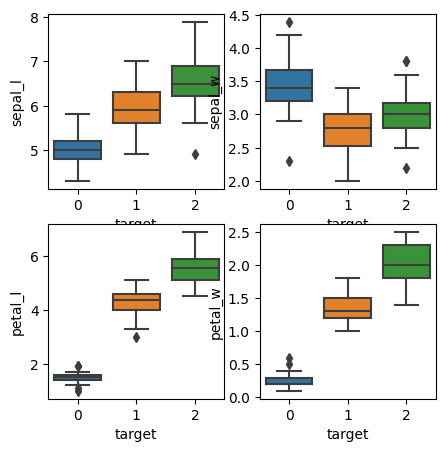

2. Обучение модели.
— Обучите модель логистической регрессии без регуляризации. Оцените её качество на тренировочных и тестовых данных.
— Повторите шаг с добавлением L1- и L2-регуляризации. Подберите оптимальные значения параметра регуляризации с помощью кросс-валидации.


In [63]:
model = LogisticRegression()

In [64]:
model.fit(X_train, y_train)

LogisticRegression()

In [65]:
y_train_pred = model.predict(X_train)

In [66]:
y_train_pred

array([0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1,
       2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 1, 0])

In [80]:
result_no_opt = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1'])
result_no_opt

,model,accuracy,precision,recall,f1


In [81]:
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average='micro')
recall = recall_score(y_train, y_train_pred, average='micro')
f1 = f1_score(y_train, y_train_pred, average='micro')
result_no_opt.loc[len(result_no_opt.index)] = ['no_reg', accuracy, precision, recall, f1]
result_no_opt


,model,accuracy,precision,recall,f1
0,no_reg,0.958333,0.958333,0.958333,0.958333


In [ ]:
# Пожалуйста, отложите проверку до понедельника. Я пришлю готовую работу за выходные.